#                Exploratory Data Analysis on Indian Premiere League


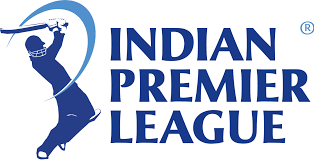

# Nischitha D

# Data Science and Business Analyst Intern @Sparks Foundation 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
deliveries=pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
deliveries.shape

(179078, 21)

In [5]:
matches.shape

(756, 18)

In [6]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
matches.dropna(inplace=True)

In [10]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

In [11]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [12]:
deliveries.dropna(inplace=True)

In [13]:
deliveries.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [14]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,9572.610169,2018.491525,0.025424,11.355932,3.271186
std,1685.654201,0.502060,0.158080,21.090981,3.233534
min,7894.000000,2018.000000,0.000000,0.000000,0.000000
25%,7923.250000,2018.000000,0.000000,0.000000,0.000000
50%,7952.500000,2018.000000,0.000000,0.000000,4.000000
75%,11319.750000,2019.000000,0.000000,14.000000,6.000000
max,11415.000000,2019.000000,1.000000,118.000000,10.000000


In [15]:
deliveries.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.000000,6448.0,6448.00000,6448.000000,6448.0,6448.000000,6448.000000,6448.000000
mean,1865.613834,1.473635,12.175713,3.640199,0.001241,0.004498,0.0,0.00031,0.000465,0.0,0.045906,0.005273,0.051179
std,3527.570149,0.503057,5.981590,1.788285,0.035204,0.066918,0.0,0.01761,0.021567,0.0,0.218719,0.072429,0.230695
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
25%,186.000000,1.000000,7.000000,2.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
50%,380.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
75%,573.000000,2.000000,18.000000,5.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000
max,11415.000000,4.000000,20.000000,9.000000,1.000000,1.000000,0.0,1.00000,1.000000,0.0,2.000000,1.000000,2.000000


In [16]:
unique_years = matches['season'].unique()
print(unique_years)

[2018 2019]


In [17]:
matches['team1'].unique()

array(['Mumbai Indians', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Chennai Super Kings',
       'Sunrisers Hyderabad', 'Delhi Capitals'], dtype=object)

In [18]:
matches['team2'].unique()

array(['Chennai Super Kings', 'Kings XI Punjab', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Delhi Daredevils',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Mumbai Indians', 'Delhi Capitals'], dtype=object)

# Team won by Maximum Runs

In [19]:
max_runs_index = matches['win_by_runs'].idxmax()
max_runs_match = matches.loc[max_runs_index]
print(max_runs_match)

id                                              11147
season                                           2019
city                                        Hyderabad
date                                         31/03/19
team1                             Sunrisers Hyderabad
team2                     Royal Challengers Bangalore
toss_winner               Royal Challengers Bangalore
toss_decision                                   field
result                                         normal
dl_applied                                          0
winner                            Sunrisers Hyderabad
win_by_runs                                       118
win_by_wickets                                      0
player_of_match                            J Bairstow
venue              Rajiv Gandhi Intl. Cricket Stadium
umpire1                                        S Ravi
umpire2                          KN Anantapadmanabhan
umpire3                                 C Shamshuddin
Name: 706, dtype: object


# Team won by Minimum Runs

In [20]:
min_runs_index = matches['win_by_runs'].idxmin()
min_runs_match = matches.loc[min_runs_index]
print(min_runs_match)

id                                7894
season                            2018
city                            Mumbai
date                          07/04/18
team1                   Mumbai Indians
team2              Chennai Super Kings
toss_winner        Chennai Super Kings
toss_decision                    field
result                          normal
dl_applied                           0
winner             Chennai Super Kings
win_by_runs                          0
win_by_wickets                       1
player_of_match               DJ Bravo
venue                 Wankhede Stadium
umpire1                 Chris Gaffaney
umpire2                A Nanda Kishore
umpire3                 Anil Chaudhary
Name: 636, dtype: object


# Team won by Maximum wickets

In [21]:
max_wickets_index = matches['win_by_wickets'].idxmax()
max_wickets_match = matches.loc[max_wickets_index]
print(max_wickets_match)

id                                        7941
season                                    2018
city                                    Indore
date                                  14/05/18
team1                          Kings XI Punjab
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                            field
result                                  normal
dl_applied                                   0
winner             Royal Challengers Bangalore
win_by_runs                                  0
win_by_wickets                              10
player_of_match                       UT Yadav
venue                   Holkar Cricket Stadium
umpire1                         Bruce Oxenford
umpire2                  Virender Kumar Sharma
umpire3                               O Nandan
Name: 683, dtype: object


# Team won by Minimum wickets

In [22]:
min_wickets_index = matches['win_by_wickets'].idxmin()
min_wickets_match = matches.loc[min_wickets_index]
print(min_wickets_match)

id                                   7899
season                               2018
city                               Jaipur
date                             11/04/18
team1                    Rajasthan Royals
team2                    Delhi Daredevils
toss_winner              Delhi Daredevils
toss_decision                       field
result                             normal
dl_applied                              1
winner                   Rajasthan Royals
win_by_runs                            10
win_by_wickets                          0
player_of_match                 SV Samson
venue              Sawai Mansingh Stadium
umpire1              K Ananthapadmanabhan
umpire2                        Rod Tucker
umpire3                       Nitin Menon
Name: 641, dtype: object


# Team Performance Analysis

In [23]:
season_wise_team_wins = matches.groupby(['season', 'winner']).size().unstack(fill_value=0)
total_team_wins = season_wise_team_wins.sum()
team_with_max_wins = total_team_wins.idxmax()
max_wins = total_team_wins.max()

print(f"The team with the maximum total wins across all seasons is '{team_with_max_wins}' with {max_wins} wins.")

The team with the maximum total wins across all seasons is 'Chennai Super Kings' with 21 wins.


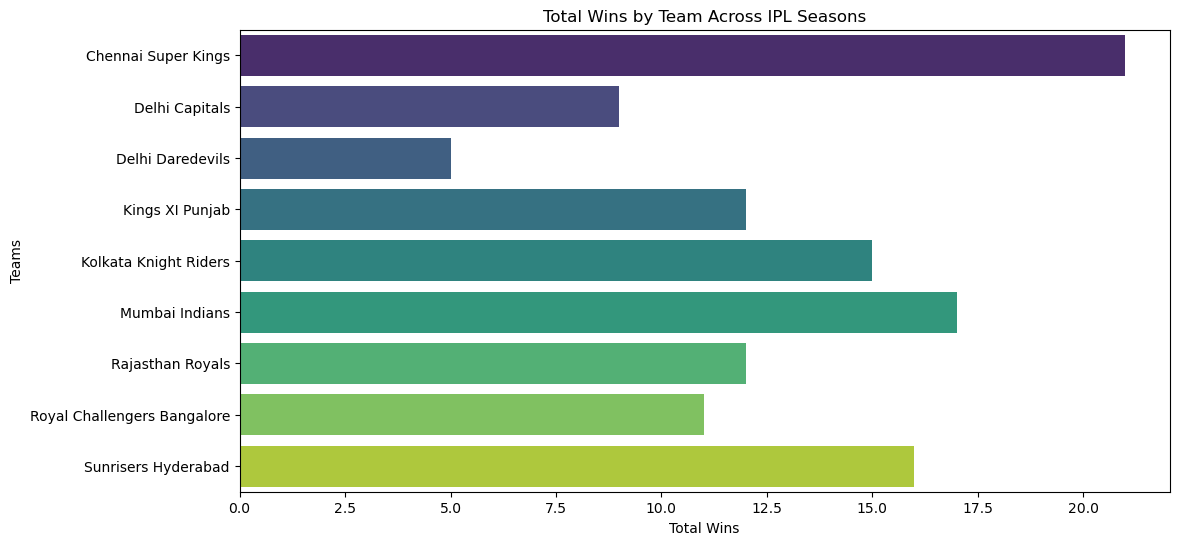

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=total_team_wins.values, y=total_team_wins.index, palette='viridis')
plt.title('Total Wins by Team Across IPL Seasons')
plt.xlabel('Total Wins')
plt.ylabel('Teams')
plt.show()

# Player Performance Analysis

In [25]:
total_runs_by_player = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
top_successful_players = total_runs_by_player.head(10)
print("Top Successful Players in IPL (Runs Scored):")
print(top_successful_players)

Top Successful Players in IPL (Runs Scored):
batsman
RG Sharma           6
V Kohli             6
KD Karthik          6
SR Watson           6
Harbhajan Singh     5
MS Dhoni            5
YK Pathan           5
Y Venugopal Rao     5
IK Pathan           5
DPMD Jayawardene    5
Name: batsman_runs, dtype: int64


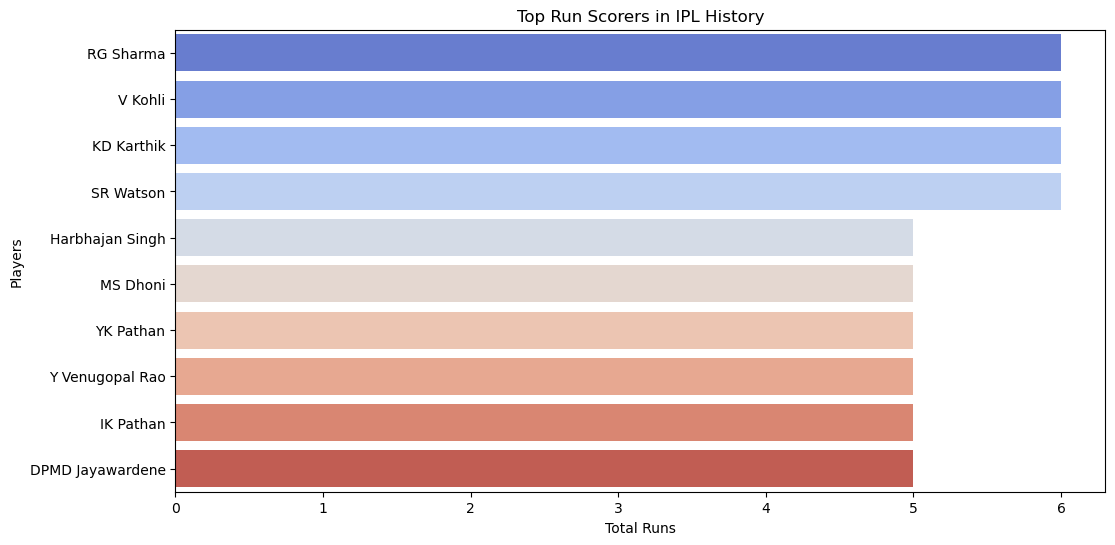

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_successful_players.values, y=top_successful_players.index, palette='coolwarm')
plt.title('Top Run Scorers in IPL History')
plt.xlabel('Total Runs')
plt.ylabel('Players')
plt.show()

In [27]:
total_wickets_by_player = deliveries[deliveries['player_dismissed'].notnull()].groupby('bowler')['player_dismissed'].count().sort_values(ascending=False)
top_successful_bowlers = total_wickets_by_player.head(10)
print("Top Successful Bowlers in IPL (Wickets Taken):")
print(top_successful_bowlers)

Top Successful Bowlers in IPL (Wickets Taken):
bowler
DJ Bravo           134
A Mishra           123
Harbhajan Singh    112
SL Malinga         109
UT Yadav           106
R Vinay Kumar      104
R Ashwin            99
PP Chawla           93
B Kumar             93
A Nehra             91
Name: player_dismissed, dtype: int64


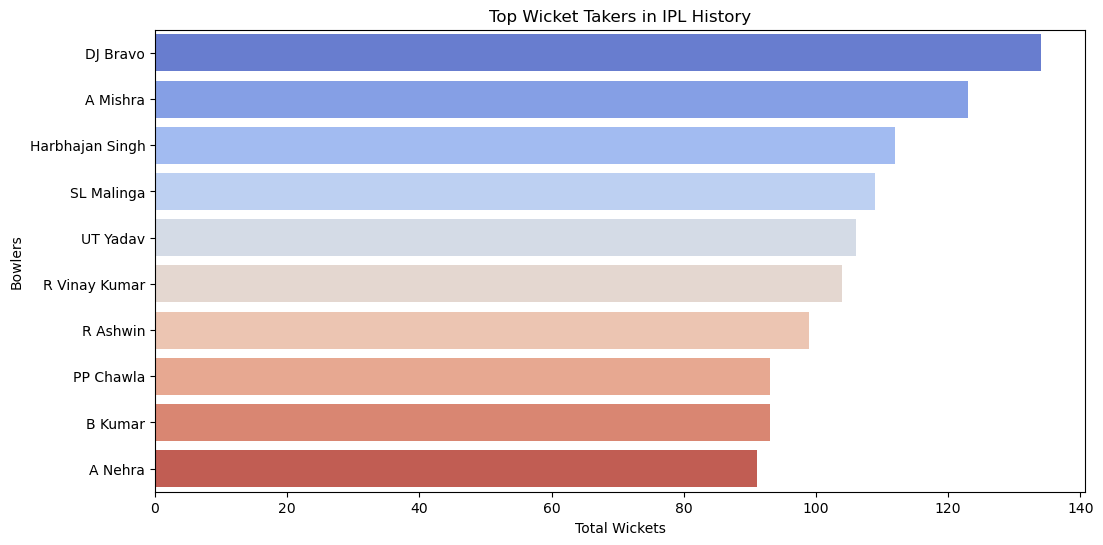

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_successful_bowlers.values, y=top_successful_bowlers.index, palette='coolwarm')
plt.title('Top Wicket Takers in IPL History')
plt.xlabel('Total Wickets')
plt.ylabel('Bowlers')
plt.show()

# Factors Contributing to Wins and Losses

In [29]:
match_data = matches[['id', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'win_by_runs', 'win_by_wickets']]

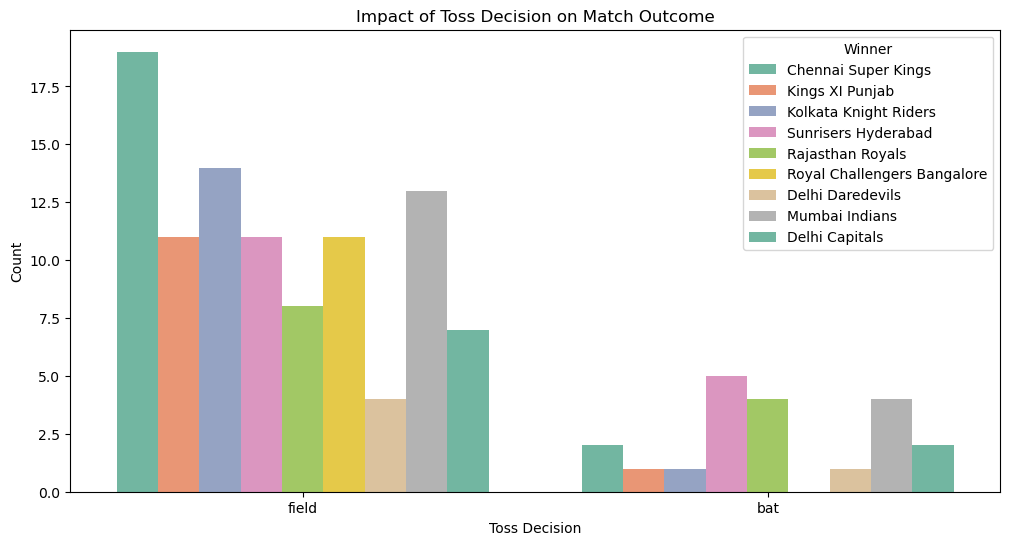

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='toss_decision', hue='winner', data=match_data, palette='Set2')
plt.title('Impact of Toss Decision on Match Outcome')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.legend(title='Winner', loc='upper right')
plt.show()

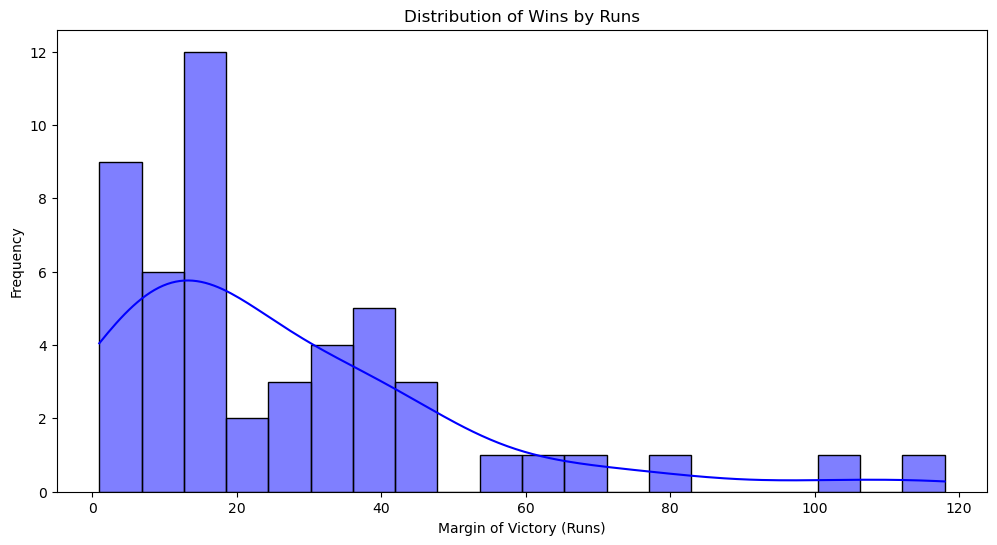

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(match_data[match_data['win_by_runs'] > 0]['win_by_runs'], bins=20, kde=True, color='blue')
plt.title('Distribution of Wins by Runs')
plt.xlabel('Margin of Victory (Runs)')
plt.ylabel('Frequency')
plt.show()

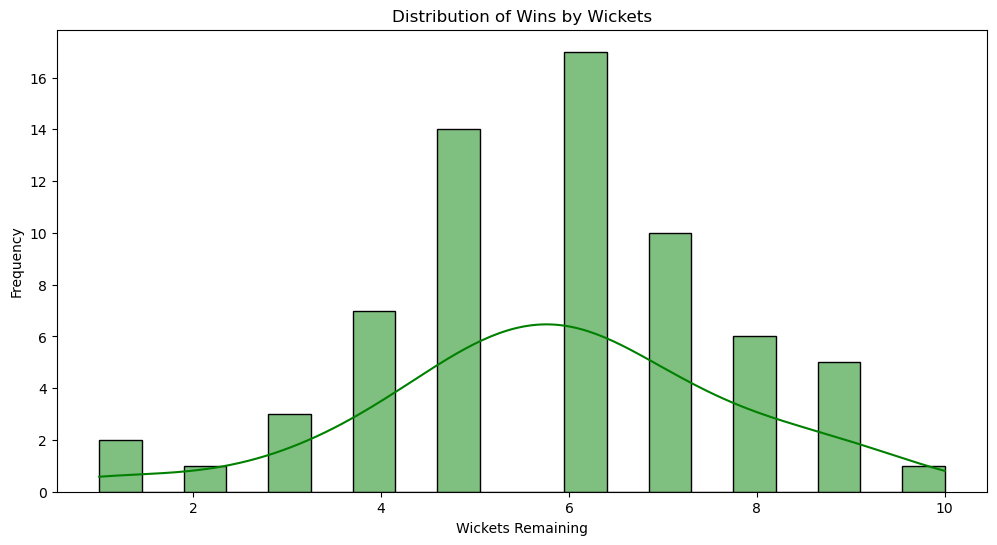

In [32]:
plt.figure(figsize=(12, 6))
sns.histplot(match_data[match_data['win_by_wickets'] > 0]['win_by_wickets'], bins=20, kde=True, color='green')
plt.title('Distribution of Wins by Wickets')
plt.xlabel('Wickets Remaining')
plt.ylabel('Frequency')
plt.show()

# Conclusion: Top 10 Players for Endorsements in IPL
    
# Based on their performance in terms of total runs and wickets taken across all IPL seasons, here are the top 10 players we recommend for endorsement for company products 

# Top Successful Players in IPL (Runs Scored):
1. RG Sharma           6
2. V Kohli             6
3. KD Karthik          6
4. SR Watson           6
5. Harbhajan Singh     5
6. MS Dhoni            5
7. YK Pathan           5
8. Y Venugopal Rao     5
9. IK Pathan           5
10. DPMD Jayawardene    5


# Top Successful Bowlers in IPL (Wickets Taken):

1. DJ Bravo           134
2. A Mishra           123
3. Harbhajan Singh    112
4. SL Malinga         109
5. UT Yadav           106
6. R Vinay Kumar      104
7. R Ashwin            99
8. PP Chawla           93
9. B Kumar             93
10. A Nehra            91